# Probability Distributions

# Some typical stuff we'll likely use

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

# [SciPy](https://scipy.org)

### [scipy.stats](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html)

In [2]:
import scipy as sp
import scipy.stats as st

# Binomial Distribution

### <font color=darkred> **Example**: A couple, who are both carriers for a recessive disease, wish to have 5 children. They want to know the probability that they will have four healthy kids.</font>

In this case the random variable is the number of healthy kids.

In [39]:
# number of trials (kids)
n = 5

# probability of success on each trial
# i.e. probability that each child will be healthy = 1 - 0.5 * 0.5 = 0.75
p = 0.75

# a binomial distribution object
dist = st.binom(n, p)

# probability of four healthy kids
dist.pmf(4)

0.39550781249999994

In [40]:
print(f"The probability of having four healthy kids is {dist.pmf(4):.3f}")

The probability of having four healthy kids is 0.396


### <font color=darkred>Probability to have each of 0-5 healthy kids.</font>

In [41]:
# all possible # of successes out of n trials
# i.e. all possible outcomes of the random variable
# i.e. all possible number of healthy kids = 0-5
numHealthyKids = np.arange(n+1)

numHealthyKids

array([0, 1, 2, 3, 4, 5])

In [42]:
# probability of obtaining each possible number of successes
# i.e. probability of having each possible number of healthy children
pmf = dist.pmf(numHealthyKids)

pmf

array([0.00097656, 0.01464844, 0.08789062, 0.26367187, 0.39550781,
       0.23730469])

### <font color=darkred>Visualize the probability to have each of 0-5 healthy kids.</font>

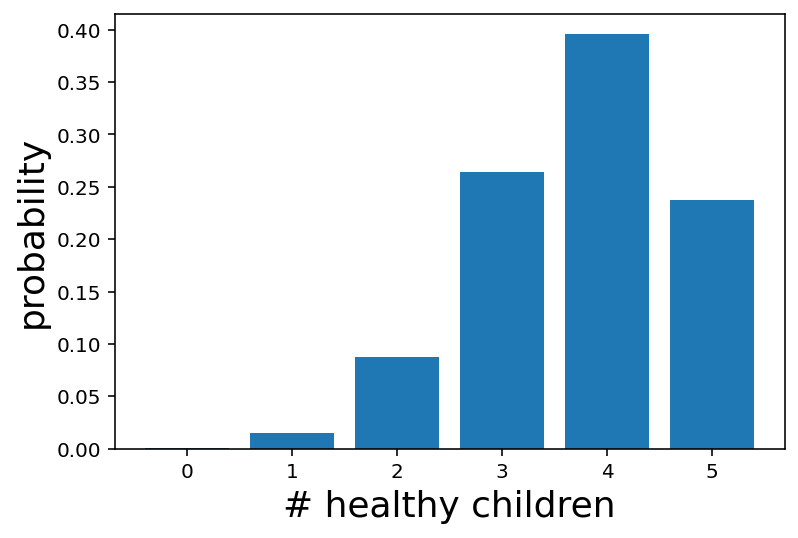

In [43]:
plt.bar(numHealthyKids, pmf)
plt.xlabel('# healthy children', fontsize=18)
plt.ylabel('probability', fontsize=18);

### <font color=darkred>Probability to have at least 4 healthy kids.</font>

In [51]:
# sum of probabilities of 4 and 5 healthy kids
pmf[-2:].sum()

0.6328125

In [45]:
# remaining probability after subtracting CDF for 3 kids
1 - dist.cdf(3)

0.6328125

In [46]:
# survival function for 3 kids
dist.sf(3)

0.6328125

### <font color=darkred>What is the expected number of healthy kids?</font>

In [47]:
print(f"The expected number of healthy kids is {dist.mean()}")

The expected number of healthy kids is 3.75


### <font color=darkred>How sure are we about the above estimate?</font>

In [50]:
print(f"The expected number of healthy kids is {dist.mean()} ± {dist.std():.2f}")

The expected number of healthy kids is 3.75 ± 0.97


# <font color=red> Exercise</font>

Should the couple consider having six children?

1. Plot the *pmf* for the probability of each possible number of healthy children.
2. What's the probability that they will all be healthy?

# Poisson Distribution

### <font color=darkred> **Example**: Assume that the rate of deleterious mutations is ~1.2 per diploid genome. What is the probability that an individual has 8 or more spontaneous deleterious mutations?</font>

In this case the random variable is the number of deleterious mutations within an individuals genome.

In [53]:
# the rate of deleterious mutations is 1.2 per diploid genome
rate = 1.2

# poisson distribution describing the predicted number of spontaneous mutations
dist = st.poisson(rate)

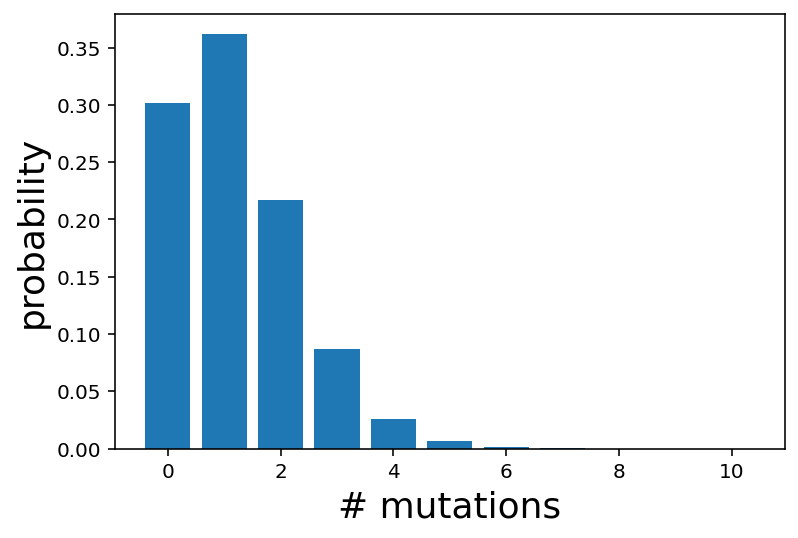

In [55]:
# let's look at the probability for 0-10 mutations
numMutations = np.arange(11)

plt.bar(numMutations, dist.pmf(numMutations))
plt.xlabel('# mutations', fontsize=18)
plt.ylabel('probability', fontsize=18);

In [60]:
print(f"Probability of less than 8 mutations = {dist.cdf(7)}")
print(f"Probability of 8 or more mutations = {dist.sf(7)}")
dist.cdf(7) + dist.sf(7)

Probability of less than 8 mutations = 0.9999630211320938
Probability of 8 or more mutations = 3.6978867906171055e-05


1.0

# <font color=red> Exercise</font>

For the above example, what is the probability that an individual has three or fewer mutations?

# Exponential Distribution

### <font color=darkred> **Example**: Assume that a neuron spikes 1.5 times per second on average. Plot the probability density function of interspike intervals from zero to five seconds with a resolution of 0.01 seconds.</font>

In this case the random variable is the interspike interval time.

In [61]:
# spike rate per second
rate = 1.5

# exponential distribution describing the neuron's predicted interspike intervals
dist = st.expon(loc=0, scale=1/rate)

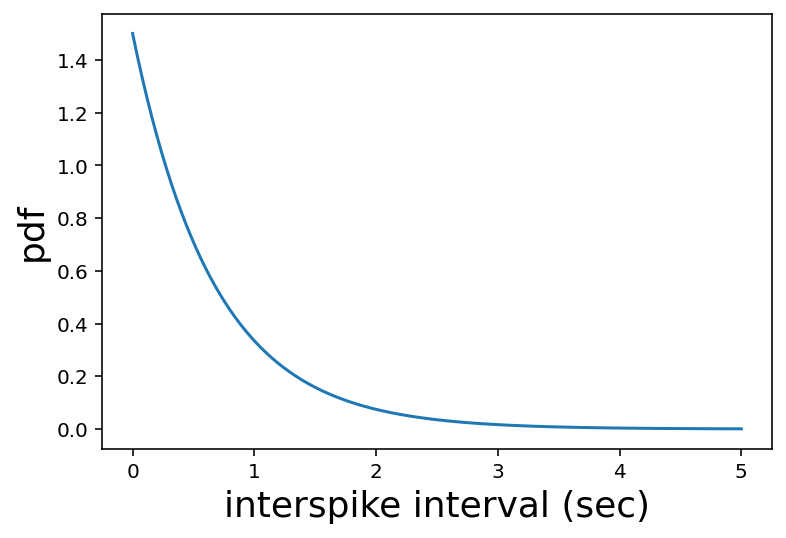

In [62]:
# plot interspike intervals from 0-5 seconds at 0.01 sec resolution
intervalsSec = np.linspace(0, 5, 501)

# probability density for each interval
pdf = dist.pdf(intervalsSec)

plt.plot(intervalsSec, pdf)
plt.xlabel('interspike interval (sec)', fontsize=18)
plt.ylabel('pdf', fontsize=18);

### <font color=darkred>What is the average interval?</font>

In [65]:
print(f"Average interspike interval = {dist.mean():.2f} seconds.")

Average interspike interval = 0.67 seconds.


### <font color=darkred>time constant = 1 / rate = mean</font>

In [66]:
tau = 1 / rate
tau

0.6666666666666666

### <font color=darkred> What is the probability that an interval will be between 1 and 2 seconds?</font>

In [67]:
prob1to2 = dist.cdf(2) - dist.cdf(1);

print(f"Probability of an interspike interval being between 1 and 2 seconds is {prob1to2:.2f}")

Probability of an interspike interval being between 1 and 2 seconds is 0.17


### <font color=darkred> For what time *T* is the probability that an interval is shorter than *T* equal to 25%?</font>

In [71]:
timeAtFirst25PercentOfDist = dist.ppf(0.25)  # percent point function

print(f"There is a 25% chance that an interval is shorter than {timeAtFirst25PercentOfDist:.2f} seconds.")

There is a 25% chance that an interval is shorter than 0.19 seconds.


# <font color=red> Exercise</font>

For the above example, what is the probability that 3 seconds will pass without any spikes?

# Normal Distribution

### <font color=darkred> **Example**: Under basal conditions the resting membrane voltage of a neuron fluctuates around -70 mV with a variance of 10 mV.</font>

In this case the random variable is the neuron's resting membrane voltage.

In [72]:
# mean resting membrane voltage (mV)
mu = -70

# standard deviation about the mean
sd = np.sqrt(10)

# normal distribution describing the neuron's predicted resting membrane voltage
dist = st.norm(mu, sd)

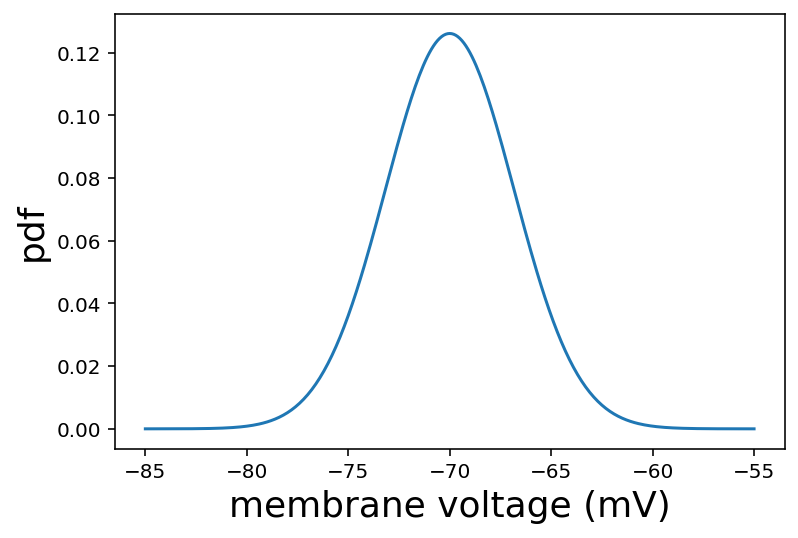

In [73]:
# membrane voltages from -85 to -55 mV
mV = np.linspace(-85, -55, 301)

# probability density for each membrane voltage in mV
pdf = dist.pdf(mV)

plt.plot(mV, pdf)
plt.xlabel('membrane voltage (mV)', fontsize=18)
plt.ylabel('pdf', fontsize=18);

### <font color=darkred> What range of membrane voltages (centered on the mean) account for 95% of the probability.</font>

In [77]:
low = dist.ppf(0.025)  # first 2.5% of distribution
high = dist.ppf(0.975) # first 97.5% of distribution

print(f"95% of membrane voltages are expected to fall within {low :.1f} and {high :.1f} mV.")

95% of membrane voltages are expected to fall within -76.2 and -63.8 mV.


# <font color=red> Exercise</font>

In a resting neuron, what's the probability that you would measure a membrane voltage greater than -65 mV?

If you meaassure -65 mV, is the neuron at rest?

# <font color=red> Exercise</font>

What probability distribution might best describe the number of synapses per millimeter of dendrite?

    A) Binomial
    B) Poisson
    C) Exponential
    D) Normal

# <font color=red> Exercise</font>

What probability distribution might best describe the time a protein spends in its active conformation?

    A) Binomial
    B) Poisson
    C) Exponential
    D) Normal

# <font color=red> Exercise</font>

What probability distribution might best describe the weights of adult mice in a colony?

    A) Binomial
    B) Poisson
    C) Exponential
    D) Normal

# <font color=red> Exercise</font>

What probability distribution might best describe the number of times a subject is able to identify the correct target in a series of trials?

    A) Binomial
    B) Poisson
    C) Exponential
    D) Normal